In [1]:
import os
import matplotlib.pyplot as plt

from models.GAN import GAN
from utils.loaders import load_safari

Using TensorFlow backend.


In [7]:
# run params
SECTION = 'gan'
RUN_ID = '0001'
DATA_NAME = 'camel'
RUN_FOLDER = 'run/{}/'.format(SECTION)
RUN_FOLDER += '_'.join([RUN_ID, DATA_NAME])

if not os.path.exists(RUN_FOLDER):
    os.mkdir(RUN_FOLDER)
    os.mkdir(os.path.join(RUN_FOLDER, 'viz'))
    os.mkdir(os.path.join(RUN_FOLDER, 'images'))
    os.mkdir(os.path.join(RUN_FOLDER, 'weights'))

mode =  'build' #'load' #

In [3]:
(x_train, y_train) = load_safari(DATA_NAME)

In [4]:
x_train.shape

(80000, 28, 28, 1)

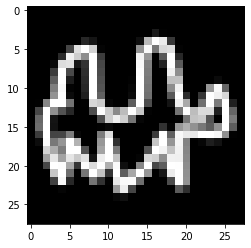

In [5]:
plt.imshow(x_train[100, :,:,0], cmap='gray')

In [8]:
gan = GAN(input_dim = (28,28,1)
        , discriminator_conv_filters = [64,64,128,128]
        , discriminator_conv_kernel_size = [5,5,5,5]
        , discriminator_conv_strides = [2,2,2,1]
        , discriminator_batch_norm_momentum = None
        , discriminator_activation = 'relu'
        , discriminator_dropout_rate = 0.4
        , discriminator_learning_rate = 0.0008
        , generator_initial_dense_layer_size = (7, 7, 64)
        , generator_upsample = [2,2, 1, 1]
        , generator_conv_filters = [128,64, 64,1]
        , generator_conv_kernel_size = [5,5,5,5]
        , generator_conv_strides = [1,1, 1, 1]
        , generator_batch_norm_momentum = 0.9
        , generator_activation = 'relu'
        , generator_dropout_rate = None
        , generator_learning_rate = 0.0004
        , optimiser = 'rmsprop'
        , z_dim = 100)

if mode == 'build':
    gan.save(RUN_FOLDER)
else:
    gan.load_weights(os.path.join(RUN_FOLDER, 'weights/weights.h5'))

In [9]:
gan.discriminator.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
discriminator_input (InputLa (None, 28, 28, 1)         0         
_________________________________________________________________
discriminator_conv_0 (Conv2D (None, 14, 14, 64)        1664      
_________________________________________________________________
activation_10 (Activation)   (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
discriminator_conv_1 (Conv2D (None, 7, 7, 64)          102464    
_________________________________________________________________
activation_11 (Activation)   (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 7, 7, 64)          0   

In [10]:
gan.generator.summary()

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
generator_input (InputLayer) (None, 100)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 3136)              316736    
_________________________________________________________________
batch_normalization_5 (Batch (None, 3136)              12544     
_________________________________________________________________
activation_14 (Activation)   (None, 3136)              0         
_________________________________________________________________
reshape_2 (Reshape)          (None, 7, 7, 64)          0         
_________________________________________________________________
up_sampling2d_3 (UpSampling2 (None, 14, 14, 64)        0         
_________________________________________________________________
generator_conv_0 (Conv2D)    (None, 14, 14, 128)       2049

In [11]:
BATCH_SIZE = 64
EPOCHS = 6000
PRINT_EVERY_N_BATCHES = 5

In [12]:
gan.train(     
    x_train
    , batch_size = BATCH_SIZE
    , epochs = EPOCHS
    , run_folder = RUN_FOLDER
    , print_every_n_batches = PRINT_EVERY_N_BATCHES
)

C:\Users\reign\Anaconda3\envs\py375\lib\site-packages\keras\engine\training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


0 [D loss: (0.723)(R 0.694, F 0.752)] [D acc: (0.227)(0.453, 0.000)] [G loss: 0.681] [G acc: 1.000]


C:\Users\reign\Anaconda3\envs\py375\lib\site-packages\keras\engine\training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


1 [D loss: (0.712)(R 0.669, F 0.754)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.680] [G acc: 1.000]
2 [D loss: (0.685)(R 0.671, F 0.699)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.646] [G acc: 1.000]
3 [D loss: (0.834)(R 0.620, F 1.048)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.673] [G acc: 1.000]
4 [D loss: (0.699)(R 0.654, F 0.745)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.670] [G acc: 1.000]
5 [D loss: (0.713)(R 0.645, F 0.781)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.666] [G acc: 1.000]
6 [D loss: (0.677)(R 0.643, F 0.711)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.626] [G acc: 1.000]
7 [D loss: (0.710)(R 0.580, F 0.840)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.630] [G acc: 1.000]
8 [D loss: (0.664)(R 0.585, F 0.744)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.557] [G acc: 1.000]
9 [D loss: (0.874)(R 0.502, F 1.245)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.653] [G acc: 1.000]
10 [D loss: (0.687)(R 0.627, F 0.747)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.640] [G acc: 1.000]

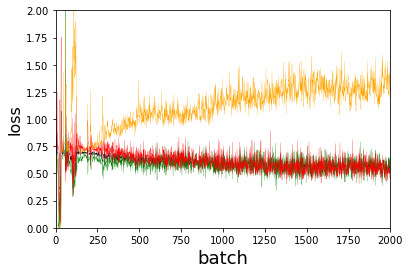

In [13]:
fig = plt.figure()
plt.plot([x[0] for x in gan.d_losses], color='black', linewidth=0.25)

plt.plot([x[1] for x in gan.d_losses], color='green', linewidth=0.25)
plt.plot([x[2] for x in gan.d_losses], color='red', linewidth=0.25)
plt.plot([x[0] for x in gan.g_losses], color='orange', linewidth=0.25)

plt.xlabel('batch', fontsize=18)
plt.ylabel('loss', fontsize=16)

plt.xlim(0, 2000)
plt.ylim(0, 2)

plt.show()

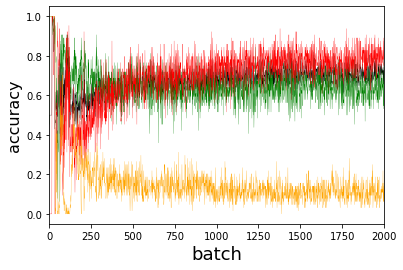

In [14]:
fig = plt.figure()
plt.plot([x[3] for x in gan.d_losses], color='black', linewidth=0.25)
plt.plot([x[4] for x in gan.d_losses], color='green', linewidth=0.25)
plt.plot([x[5] for x in gan.d_losses], color='red', linewidth=0.25)
plt.plot([x[1] for x in gan.g_losses], color='orange', linewidth=0.25)

plt.xlabel('batch', fontsize=18)
plt.ylabel('accuracy', fontsize=16)

plt.xlim(0, 2000)

plt.show()

#### 에포크 20
![20](run/gan/0001_camel/images/sample_20.png)

#### 에포크 2000
![2000](run/gan/0001_camel/images/sample_2000.png)